# Case Study on Measures of Central Tendency and Dispersion

In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_excel('StudentsPerformance.xlsx')

In [6]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


## 1. Find out how many males and females participated in the test.

In [19]:
data.groupby(by="gender").size()

gender
female    518
male      482
dtype: int64

## 2. What do you think about the students' parental level of education?

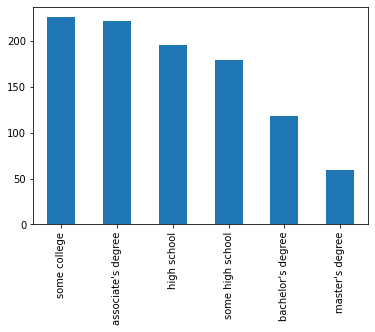

In [22]:
data['parental level of education'].value_counts().plot.bar();

## Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [24]:
data["average score"] = (data["math score"] + data["writing score"] + data["reading score"])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


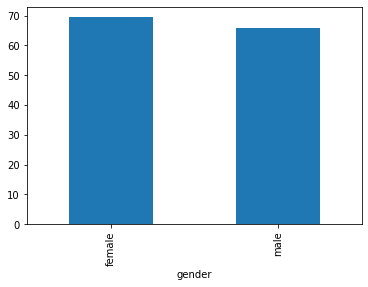

In [28]:
data.groupby('gender')['average score'].mean().plot.bar();

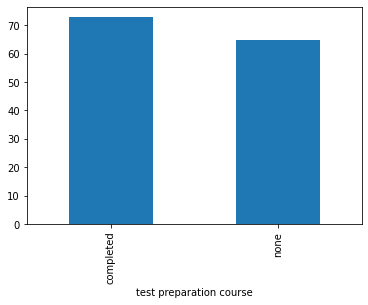

In [30]:
data.groupby('test preparation course')['average score'].mean().plot.bar();

## 4. What do you think about the scoring variation for math, reading and writing
## based on
● Gender
● Test preparation course

<AxesSubplot:xlabel='gender'>

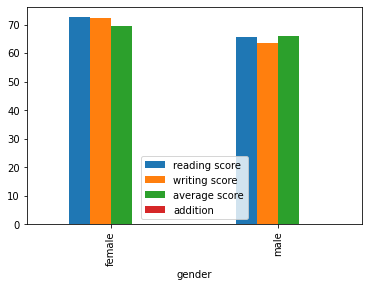

In [81]:
data.groupby(by="gender").mean().plot.bar()

<AxesSubplot:xlabel='test preparation course'>

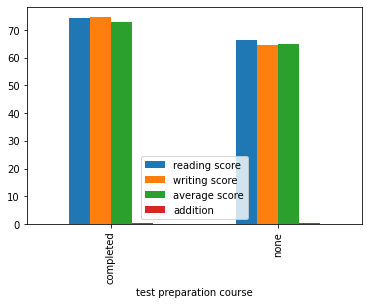

In [80]:
data.groupby(by="test preparation course").mean().plot.bar()

## 5. The management needs your help to give bonus points to the top 25% of
## students based on their maths score, so how will you help the management
## to achieve this.

In [50]:
data.sort_values("math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
3,female,group B,some college,standard,none,11,38,32,27.000000
51,female,group C,some high school,free/reduced,none,13,41,51,35.000000
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
...,...,...,...,...,...,...,...,...,...
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
515,female,group E,some college,standard,none,100,92,97,96.333333
517,female,group E,associate's degree,standard,none,100,100,100,100.000000


In [75]:
df3 = data.groupby("math score").std().round(2).reset_index()
df3.sort_values('math score',ascending=False).nlargest(25,'math score')

,math score,reading score,writing score,average score,addition
84,100,3.08,5.26,2.28,0.0
83,99,6.51,9.50,5.34,0.0
82,98,7.81,5.20,4.33,0.0
81,97,6.55,6.63,4.16,0.0
80,96,5.03,4.36,3.10,0.0
79,95,5.66,5.66,3.77,0.0
78,94,7.69,9.69,5.61,0.0
77,93,7.90,7.26,4.67,0.0
76,92,9.14,9.55,6.04,0.0
75,91,8.87,6.62,5.07,0.0


In [98]:
df3['percent']=(df3['math score']/df3['math score'].sum()) / 25 * 100
df3

,math score,reading score,writing score,average score,addition,percent
0,0,NaN,NaN,NaN,NaN,0.000000
1,8,NaN,NaN,NaN,NaN,0.006547
2,11,NaN,NaN,NaN,NaN,0.009002
3,13,NaN,NaN,NaN,NaN,0.010638
4,18,NaN,NaN,NaN,NaN,0.014730
...,...,...,...,...,...,...
80,96,5.03,4.36,3.10,0.0,0.078560
81,97,6.55,6.63,4.16,0.0,0.079378
82,98,7.81,5.20,4.33,0.0,0.080196
83,99,6.51,9.50,5.34,0.0,0.081015


In [99]:
df3.nlargest(25,'math score')

,math score,reading score,writing score,average score,addition,percent
84,100,3.08,5.26,2.28,0.0,0.081833
83,99,6.51,9.50,5.34,0.0,0.081015
82,98,7.81,5.20,4.33,0.0,0.080196
81,97,6.55,6.63,4.16,0.0,0.079378
80,96,5.03,4.36,3.10,0.0,0.078560
79,95,5.66,5.66,3.77,0.0,0.077741
78,94,7.69,9.69,5.61,0.0,0.076923
77,93,7.90,7.26,4.67,0.0,0.076105
76,92,9.14,9.55,6.04,0.0,0.075286
75,91,8.87,6.62,5.07,0.0,0.074468


In [106]:
df3['math score'] = df3['math score'] + df3['percent']
df3

,math score,reading score,writing score,average score,addition,percent
0,0.000000,NaN,NaN,NaN,NaN,0.000000
1,8.045827,NaN,NaN,NaN,NaN,0.006547
2,11.063011,NaN,NaN,NaN,NaN,0.009002
3,13.074468,NaN,NaN,NaN,NaN,0.010638
4,18.103110,NaN,NaN,NaN,NaN,0.014730
...,...,...,...,...,...,...
80,96.549918,5.03,4.36,3.10,0.0,0.078560
81,97.555646,6.55,6.63,4.16,0.0,0.079378
82,98.561375,7.81,5.20,4.33,0.0,0.080196
83,99.567103,6.51,9.50,5.34,0.0,0.081015


In [107]:
df3.nlargest(25,'math score')

,math score,reading score,writing score,average score,addition,percent
84,100.572831,3.08,5.26,2.28,0.0,0.081833
83,99.567103,6.51,9.50,5.34,0.0,0.081015
82,98.561375,7.81,5.20,4.33,0.0,0.080196
81,97.555646,6.55,6.63,4.16,0.0,0.079378
80,96.549918,5.03,4.36,3.10,0.0,0.078560
79,95.544190,5.66,5.66,3.77,0.0,0.077741
78,94.538462,7.69,9.69,5.61,0.0,0.076923
77,93.532733,7.90,7.26,4.67,0.0,0.076105
76,92.527005,9.14,9.55,6.04,0.0,0.075286
75,91.521277,8.87,6.62,5.07,0.0,0.074468
